<a href="https://colab.research.google.com/github/labib2537/Data-Mining-and-ML/blob/main/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [12]:
IMAGE_SHAPE=(224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])
classifier.trainable=False

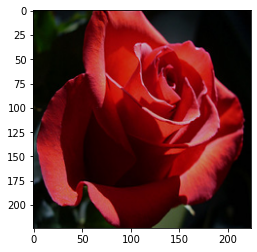

In [13]:
image=Image.open("/content/drive/MyDrive/Data Mining/flower_photos/roses/394990940_7af082cf8d_n.jpg").resize(IMAGE_SHAPE)
plt.imshow(image)

In [14]:
flower=np.array(image)/255
flower=flower[np.newaxis, ...]

result=classifier.predict(flower)
Max_result=np.argmax(result)

image_lables=[]
with open("/content/drive/MyDrive/Data Mining/Lebels.txt","r") as f:
  image_labels=f.read().splitlines()
image_labels[Max_result]

"jack-o'-lantern"

**My Model Create**

In [15]:
flower_folder=r"/content/drive/MyDrive/Data Mining/flower_photos"
catagories=['daisy','dandelion','roses','sunflowers','tulips',]

In [8]:
data=[]
for Catagories in catagories:
  Folder=os.path.join(flower_folder,Catagories)
  label=catagories.index(Catagories)

  for img in os.listdir(Folder):
    image=os.path.join(Folder,img)
    image_arr=cv2.imread(image)
    image_arr=cv2.resize(image_arr,IMAGE_SHAPE)
    data.append([image_arr,label])

In [9]:
import random
random.shuffle(data)
x=[]
y=[]
for feature,label in data :
  x.append(feature)
  y.append(label)

x=np.array(x)
y=np.array(y)

x=x/255
x

array([[[[0.08627451, 0.18823529, 0.84705882],
         [0.09803922, 0.21568627, 0.83921569],
         [0.0627451 , 0.25098039, 0.90196078],
         ...,
         [0.25490196, 0.36862745, 0.96862745],
         [0.20784314, 0.33333333, 0.91372549],
         [0.39607843, 0.50588235, 0.99607843]],

        [[0.25490196, 0.32941176, 0.97254902],
         [0.29411765, 0.31764706, 0.94117647],
         [0.21568627, 0.2745098 , 0.91372549],
         ...,
         [0.16862745, 0.42352941, 0.96862745],
         [0.24313725, 0.21176471, 0.92941176],
         [0.48235294, 0.49019608, 0.97647059]],

        [[0.13333333, 0.23529412, 0.92156863],
         [0.18431373, 0.22745098, 0.89019608],
         [0.12941176, 0.15686275, 0.85098039],
         ...,
         [0.21960784, 0.41176471, 0.99215686],
         [0.17254902, 0.25490196, 0.92156863],
         [0.43921569, 0.38823529, 0.92156863]],

        ...,

        [[0.01176471, 0.09411765, 0.00784314],
         [0.1372549 , 0.34509804, 0.19215686]

In [17]:
x.shape

(3670, 224, 224, 3)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [19]:
previous_model=hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    input_shape=IMAGE_SHAPE+(3,),
    trainable=False
)

In [20]:
number_of_flower=5
model = tf.keras.Sequential([
                 previous_model,
                 tf.keras.layers.Dense(number_of_flower)          
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [21]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 86s 951ms/step - loss: 0.8093 - acc: 0.6900
Epoch 2/5
86/86 [==============================] - 82s 949ms/step - loss: 0.4247 - acc: 0.8507
Epoch 3/5
86/86 [==============================] - 82s 955ms/step - loss: 0.3313 - acc: 0.8906
Epoch 4/5
86/86 [==============================] - 82s 950ms/step - loss: 0.2766 - acc: 0.9175
Epoch 5/5
86/86 [==============================] - 83s 960ms/step - loss: 0.2464 - acc: 0.9255


In [22]:
model.evaluate(x_test,y_test)

29/29 [==============================] - 29s 966ms/step - loss: 0.3110 - acc: 0.8769


[0.3109639585018158, 0.8769063353538513]